# Step-1: Load and Inspect

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:

df = pd.read_csv("Titanic-Dataset.csv")
df.head()          # first 5 rows
df.info()          # data types & nulls
df.describe()      # summary of numerical data
df.shape           # rows and columns
df.columns         # column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step-2: Handle Missing Data

In [60]:
df.isnull().sum() # check missing values

# fill missing value
#df.fillna(df.mean(), inplace=True)    # numerical
#df.fillna(df.mode().iloc[0], inplace=True)  # categorical



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [61]:
df['Age'].fillna(df['Age'].mean(),) # numerical

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [62]:
df['Cabin'].fillna(df['Cabin'].mode()[0])  # numerical

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
886,B96 B98
887,B42
888,B96 B98
889,C148


# Step-3: Detect Duplicates

In [63]:
df.duplicated().sum()
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Step-4: Outlier Detection

In [64]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < (Q1 - 1.5*IQR)) | (df['Age'] > (Q3 + 1.5*IQR))]

In [ ]:
#Handle → remove or clip values:
df['Age'] = df['Age'].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)# clip use
df_filtered = df[(df['Age'] >= 10) & (df['Age'] <= 50)]# outlier remove
print(df_filtered)

# Step-5: Basic Univariate Analysis

Numerical Column → Age

In [9]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Visualization

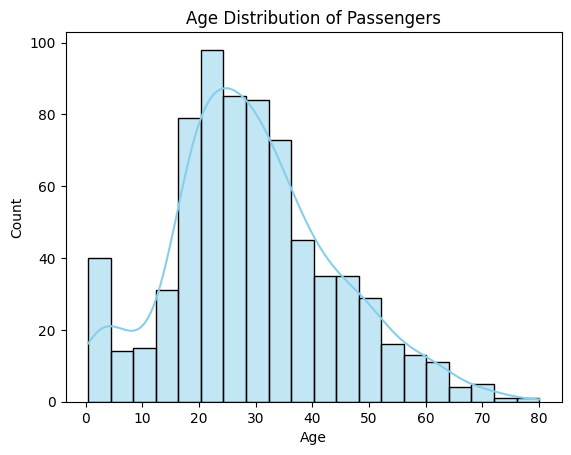

In [11]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Categorical Column → Sex

In [13]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


Visualization:

/tmp/ipython-input-1624731824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


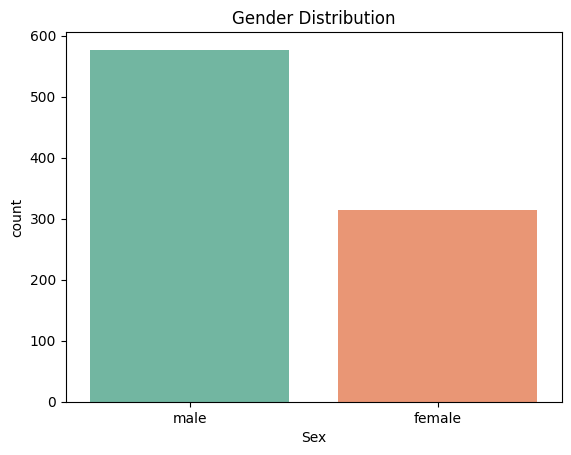

In [15]:
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()


In [18]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


/tmp/ipython-input-1875329634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='pastel')


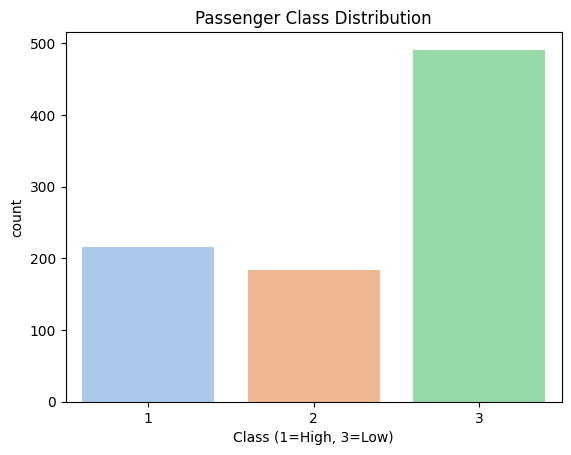

In [19]:
sns.countplot(x='Pclass', data=df, palette='pastel')
plt.title("Passenger Class Distribution")
plt.xlabel("Class (1=High, 3=Low)")
plt.show()

In [21]:
df['Survived'].value_counts(normalize=True)*100

,proportion
Survived,
0,61.616162
1,38.383838


/tmp/ipython-input-1755545214.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


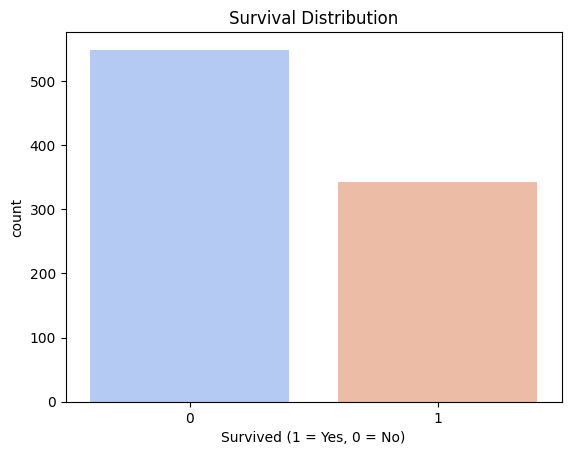

In [23]:
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Distribution")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.show()

In [27]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


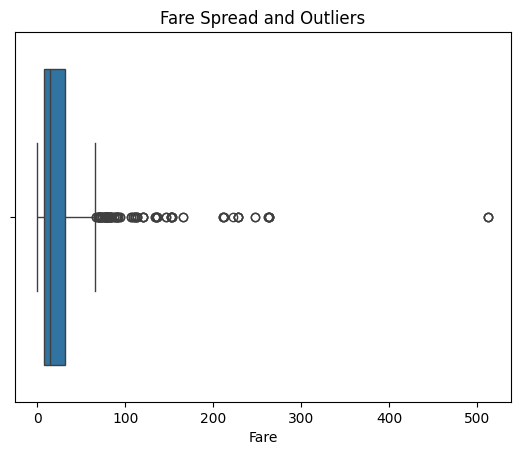

In [25]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Spread and Outliers")
plt.show()

# Step-6: Bivariate Analysis

In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

Categorical vs Categorical

In [29]:
pd.crosstab(df['sex'], df['survived'], normalize='index')

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


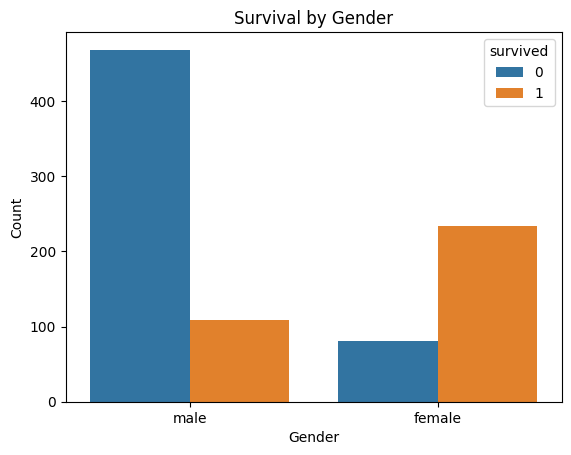

In [30]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Numerical vs Categorical

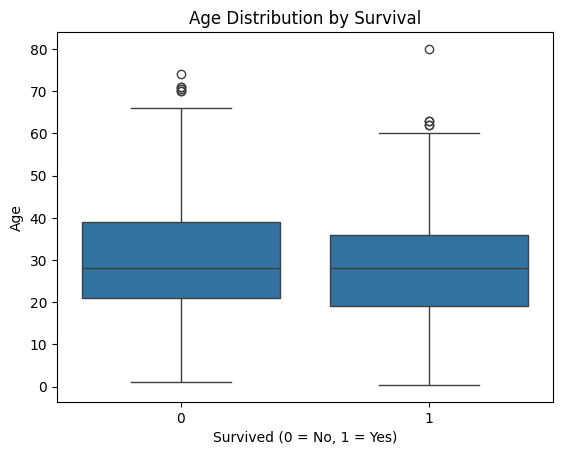

In [39]:
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

Numerical vs Numerical

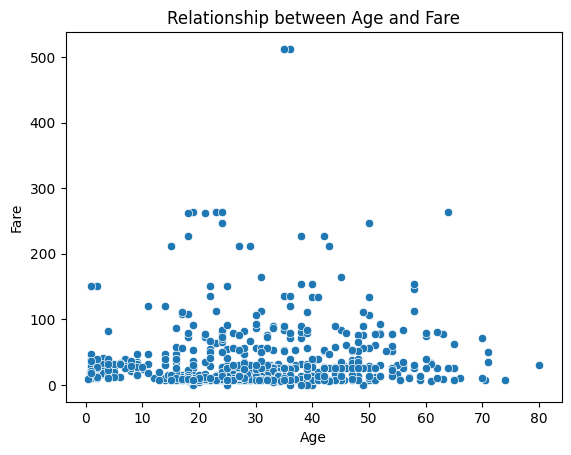

In [40]:
sns.scatterplot(x='age', y='fare', data=df)
plt.title("Relationship between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


# Step-7: Multivariate Analysis

Pclass + Sex + Survived

In [68]:
survival_table = df.pivot_table(
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)

survival_table

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


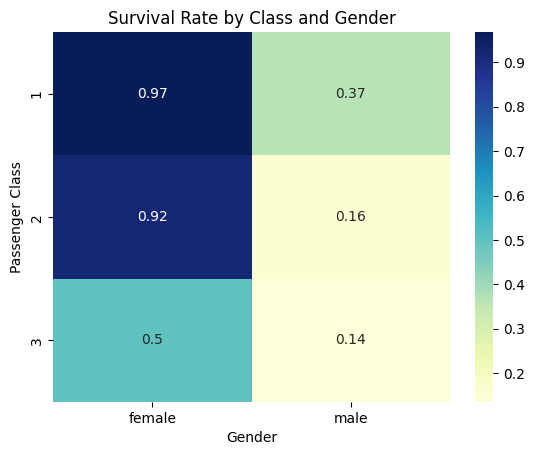

In [66]:
sns.heatmap(survival_table, annot=True, cmap='YlGnBu')
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Passenger Class")
plt.xlabel("Gender")
plt.show()

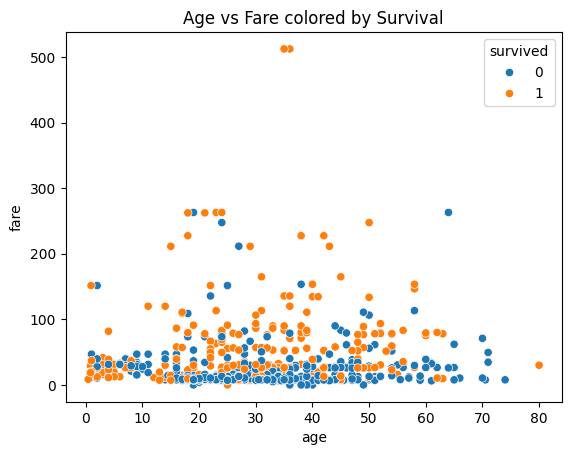

In [46]:
#Age + Fare + Survived

sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare colored by Survival")
plt.show()

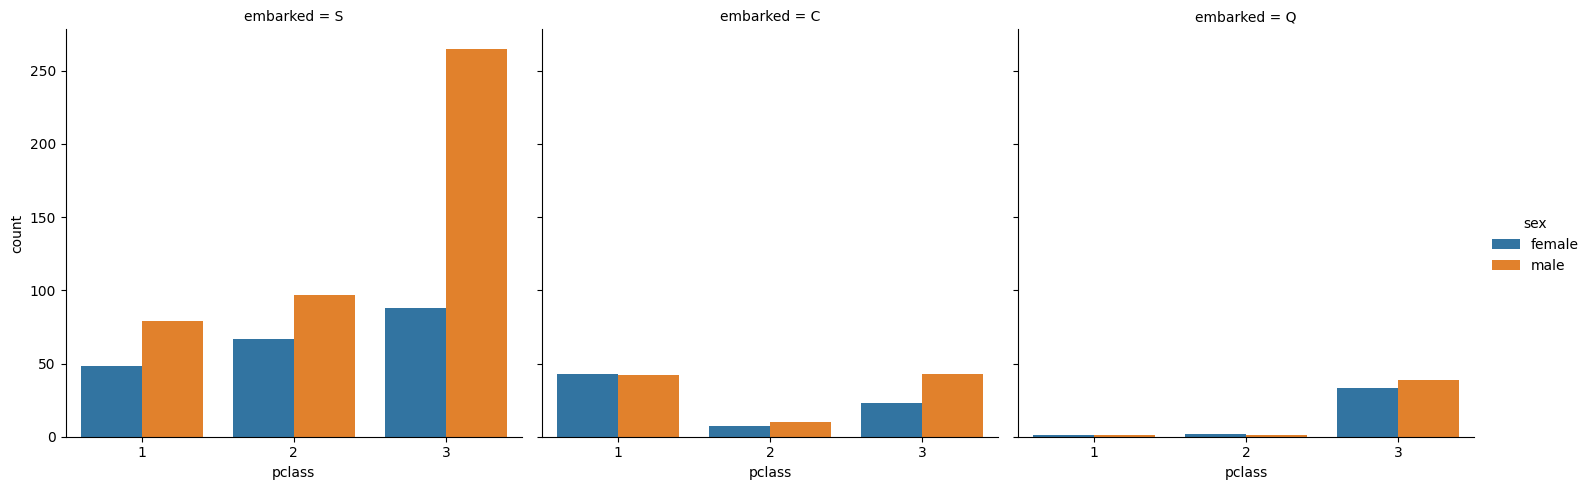

In [45]:
#Pclass + Sex + Embarked + Survived
sns.catplot(x='pclass', hue='sex', col='embarked',
            kind='count', data=df)
plt.show()

Correlation Heatmap (All Numeric Features)

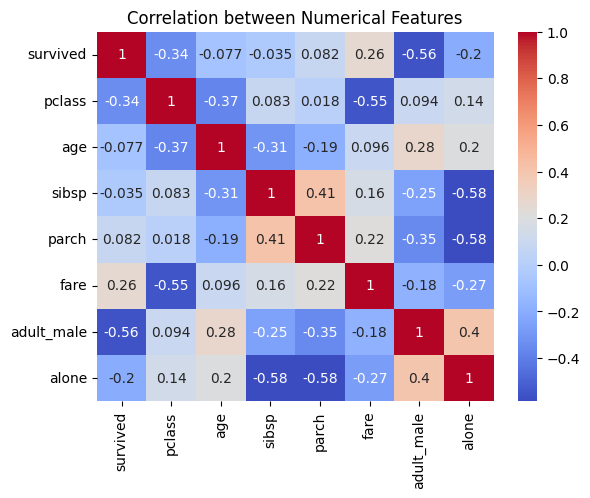

In [44]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()

# Step-9: Encoding Categorical Variables

In [47]:
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)
df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,True,False,True
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,False,False,True
888,0,3,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,False,False,True
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,True,False,False


# **Step-10: Feature Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['age','fare']])

df[['Age','Fare']]

,Age,Fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337
...,...,...
886,-0.185937,-0.386671
887,-0.737041,-0.044381
888,NaN,-0.176263
889,-0.254825,-0.044381


# Step-11: Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('survived', axis=1)
y = df['survived']
best = SelectKBest(score_func=f_classif, k=5)
fit = best.fit(X, y)

# Step-12: Visualization Summary

Histograms → distributions

Boxplots → outliers

Barplots → category vs target

Heatmaps → correlation

Pairplots → multivariate trends